# Auswertung der Doppler These
## Zusammenstellung aller Daten

Input:
- Amplitude (mit Fehler)
- Total BH mass
- Periodenzeit
- Rotverschiebung
- spectral Index $\alpha$ (mit Fehler)

## Definition Funktionen

In [1]:
import math
import numpy as np
import astropy.constants as con
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [2]:
def inclination(q: float,beta_jet: float, theta: float, amplitude, bhmass, period, redshift, spectral_index):
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    Constante = A*con.c*((1+z)*2*np.pi*con.G*M/(P))**(-1./3)
    
    return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))

In [3]:
def binary_mass_ratio(inclination: float,beta_jet: float, theta: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    return 1/(np.sin(I)/(A*con.c)*(1+(2+alpha)*beta_jet*np.cos(theta))*((1+z)*2*np.pi*con.G*M/(P))**(1./3)-1)

In [4]:
def beta_jet(inclination: float,q: float, theta: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    return ((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*np.cos(theta))

In [5]:
def theta(inclination: float,q: float, beta_jet: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))

In [6]:
def rad_to_deg(x,pos):
    return round(np.degrees(x),2)

In [7]:
def err_inclination(q: float,beta_jet: float, theta: float, err_amp: float, err_alpha: float, err_period: float, err_redshift: float, err_bhmass: float, amplitude, bhmass, period, redshift, spectral_index):
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index

    Constante2 = con.c*((1+z)*2*np.pi*con.G*M/(P))**(-1./3)
    x = A*Constante2*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta))
    print(f"{x = }")
    return x/(np.sqrt(1-x**2))*np.sqrt((err_amp/amplitude)**2+(err_period**2/period**2+err_redshift**2/(1+z)**2+err_bhmass**2/bhmass**2)/9+((beta_jet*np.cos(theta)*err_alpha)/(1+(2+alpha)*beta_jet*np.cos(theta)))**2)
    

In [8]:
def err_binary_mass_ratio(inclination: float,beta_jet: float, theta: float, err_amp: float, err_alpha: float, err_period: float, err_redshift: float, err_bhmass: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index

    Constante2 = con.c*((1+z)*2*np.pi*con.G*M/(P))**(-1./3)
    
    sigma_q = np.sin(I)/(A*Constante2)*np.sqrt((1+(2+alpha)*beta_jet*np.cos(theta))**2*(err_amp**2/A**2+(err_period**2/period**2+err_redshift**2/(1+z)**2+err_bhmass**2/bhmass**2)/9)+(beta_jet*np.cos(theta)*err_alpha)**2)
    q = binary_mass_ratio(inclination, beta_jet, theta, amplitude, bhmass, period, redshift, spectral_index)
    
    return sigma_q/q**2
    

In [9]:
def err_beta_jet(inclination: float,q: float, theta: float, err_amp: float, err_alpha: float, err_period: float, err_redshift: float, err_bhmass: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    theta = theta # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    Constante2 = con.c*((1+z)*2*np.pi*con.G*M/(P))**(-1./3)
    
    return 1/((2+alpha)*np.cos(theta))*np.sqrt(((A*Constante2*(1+1/q))/np.sin(I))**2*(err_amp**2/A**2+(err_period**2/period**2+err_redshift**2/(1+z)**2+err_bhmass**2/bhmass**2)/9)+(((A*Constante2*(1+1/q))/np.sin(I)-1)*err_alpha/(2+alpha))**2)


In [10]:
def err_theta(inclination: float,q: float, beta_jet: float, err_amp: float, err_alpha: float, err_period: float, err_redshift: float, err_bhmass: float, amplitude, bhmass, period, redshift, spectral_index):
    I = inclination # in radian (pi..)
    A = amplitude
    M = bhmass*con.M_sun # mit Einheiten!
    P = (period*u.year).cgs
    z = redshift
    alpha = spectral_index
    
    Constante2 = con.c*((1+z)*2*np.pi*con.G*M/(P))**(-1./3)
    y = 1/((2+alpha)*beta_jet)*((A*Constante2*(1+q))/np.sin(I)-1)
    print(f"{Constante2 = }")
    print(f"{y = }")
    return 1/(np.sqrt(1-y**2))*np.sqrt(((A*Constante2*(1+1/q))/((2+alpha)*beta_jet*np.sin(I)))**2*(err_amp**2/A**2+(err_period**2/period**2+err_redshift**2/(1+z)**2+err_bhmass**2/bhmass**2)/9)+((y*err_alpha)/(2+alpha))**2)
    

# OJ 014

In [11]:
z = 1.148
err_redshift = 0
M = 5.13e8 
err_bhmass = .69*np.log(10)*M
p=4.1
err_period = .4
a=0.610058471722775
err_amp= 0.06813518982378082
alpha=2.00613871200
err_alpha = 0.02866292618

par={'amplitude': a, 'bhmass': M, 'period': p, 'redshift': z, 'spectral_index': alpha}
errors = {'err_amp': err_amp, 'err_alpha': err_alpha, 'err_period': err_period, 'err_redshift': err_redshift, 'err_bhmass': err_bhmass}

## Graphical Interface

### Starting point
vmin = 0
vmax = 1
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree

### Final values (do not overlap, Doppler Thesis holds not :(


/tmp/ipykernel_90884/3865337893.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))
/home/praktikum/miniforge3/envs/fermipy/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in arcsin
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


0.00: Inclination empty
0.00: q empty


/tmp/ipykernel_90884/1209602324.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))
/home/praktikum/miniforge3/envs/fermipy/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/praktikum/miniforge3/envs/fermipy/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


0.00: theta empty
0.11: Inclination empty
0.11: q empty
0.11: theta empty
0.22: Inclination empty
0.22: q empty
0.22: theta empty
0.33: Inclination empty
0.33: q empty
0.33: theta empty
0.44: Inclination empty
0.44: q empty
0.44: theta empty
0.56: Inclination empty
0.56: q empty
0.56: theta empty
0.67: Inclination empty
0.67: q empty
0.67: theta empty
0.78: Inclination empty
0.78: q empty
0.78: theta empty
0.89: Inclination empty
0.89: q empty
0.89: theta empty
1.00: Inclination empty
1.00: q empty
1.00: theta empty


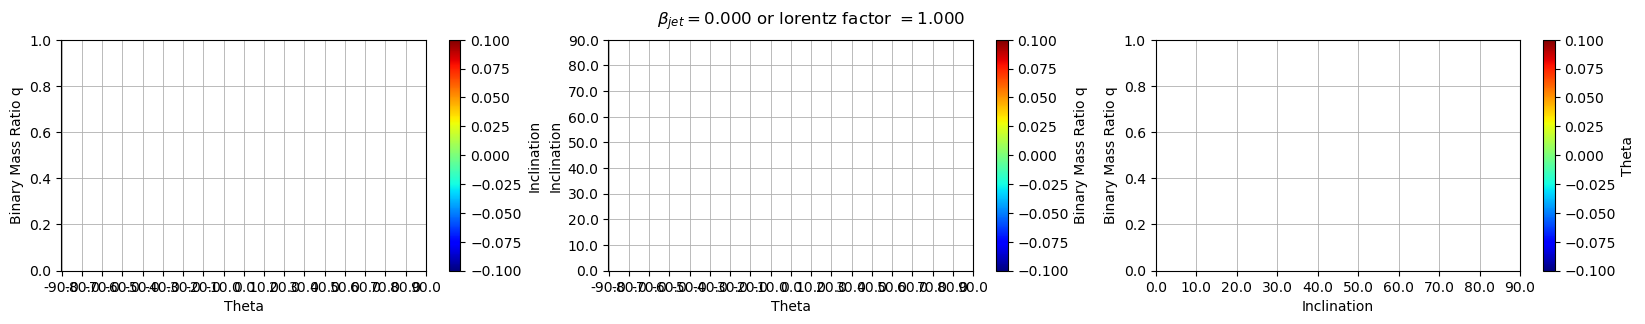

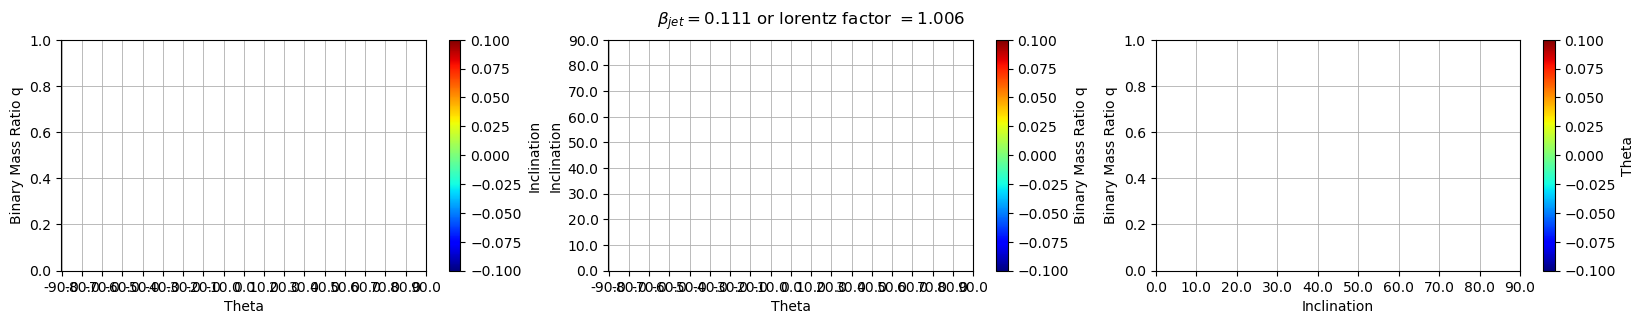

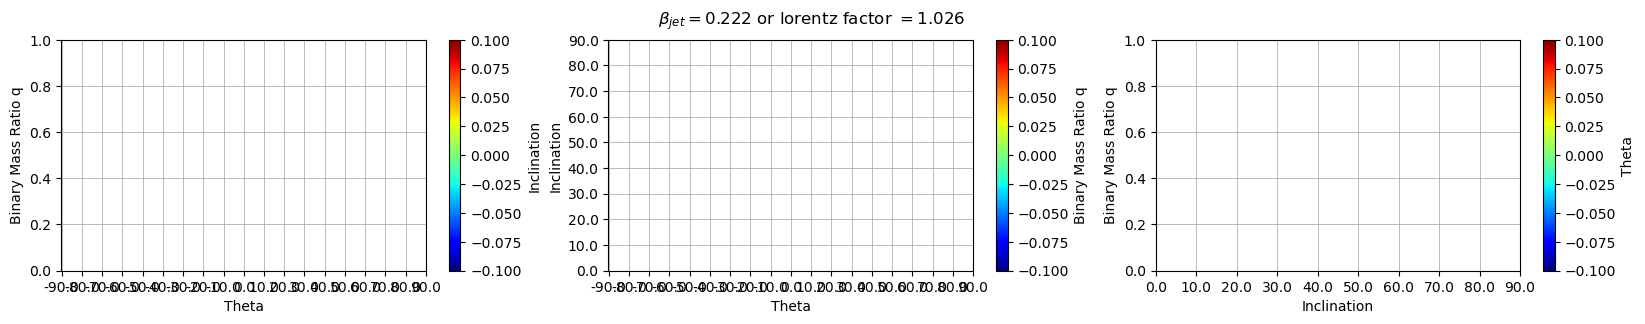

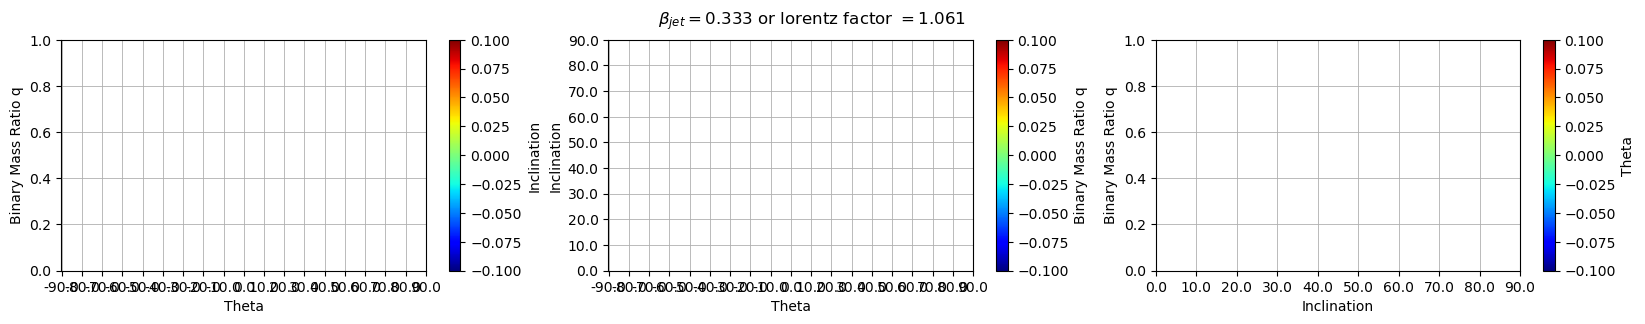

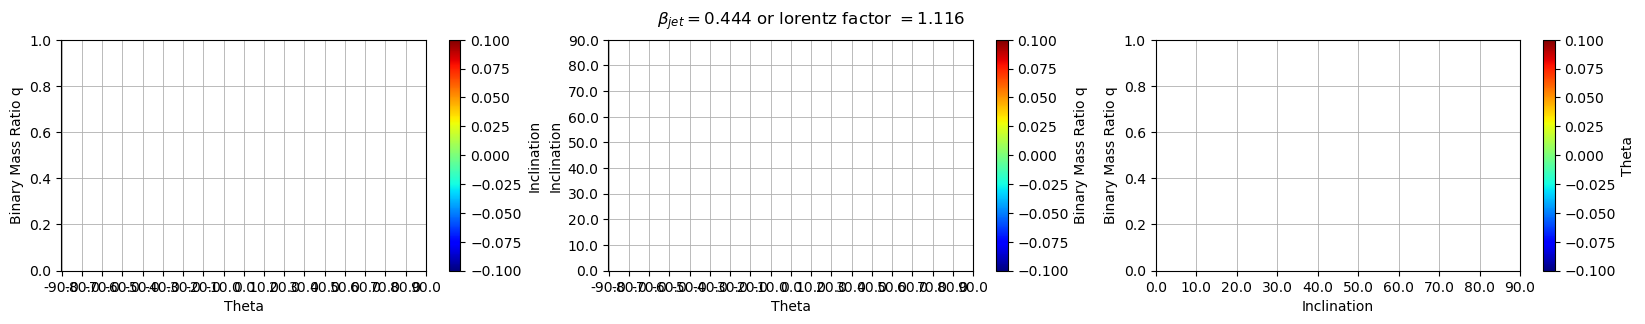

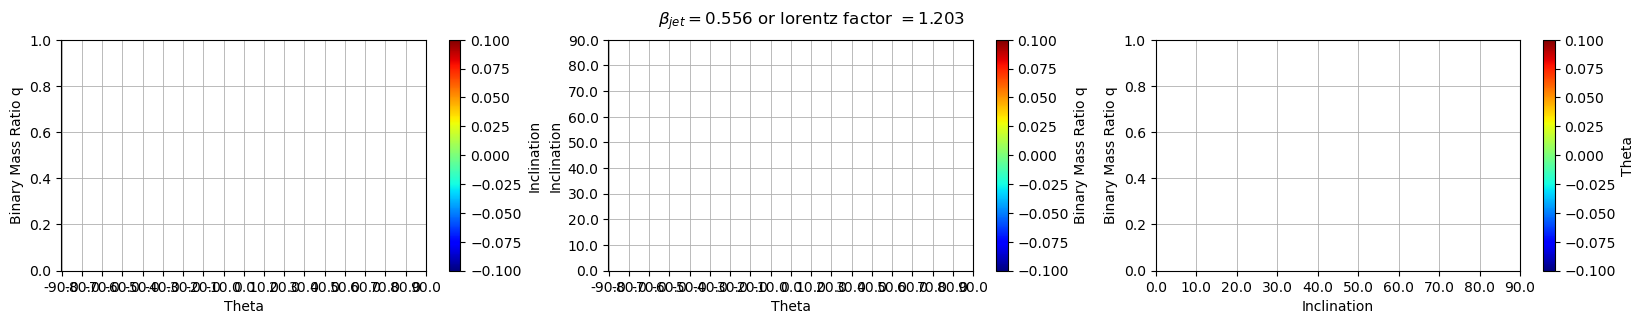

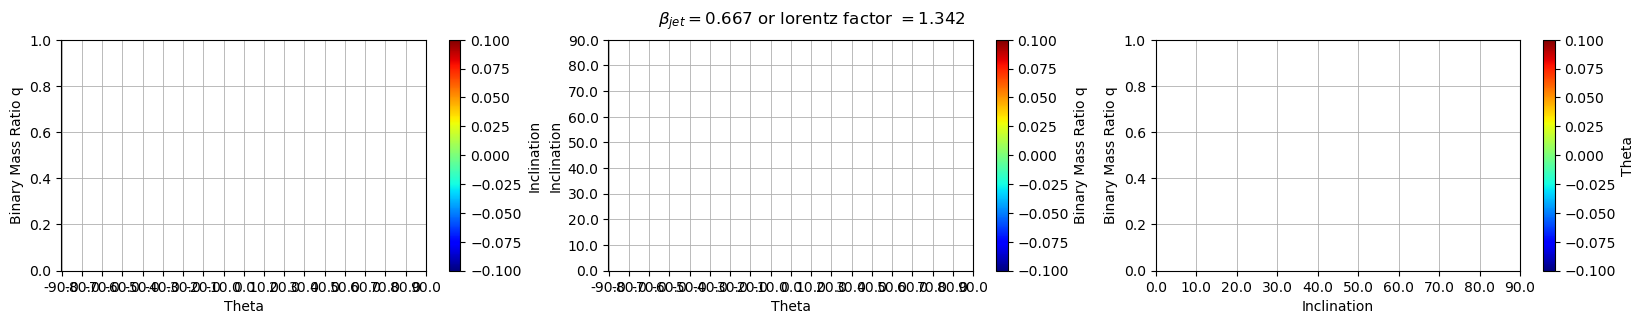

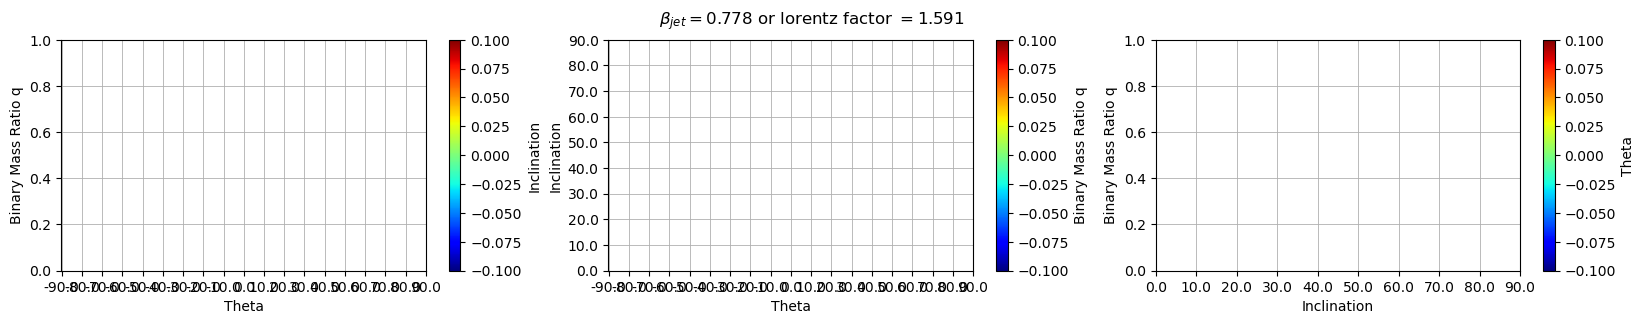

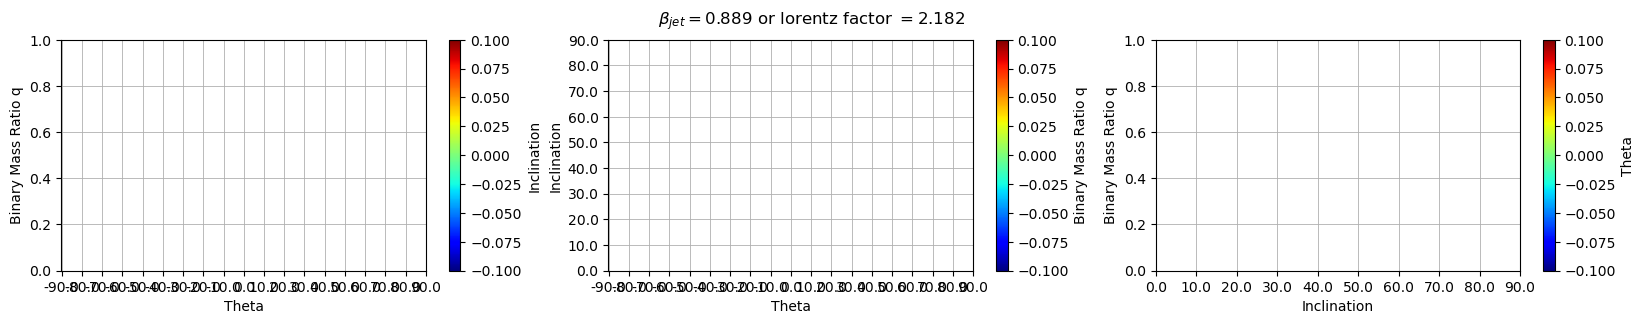

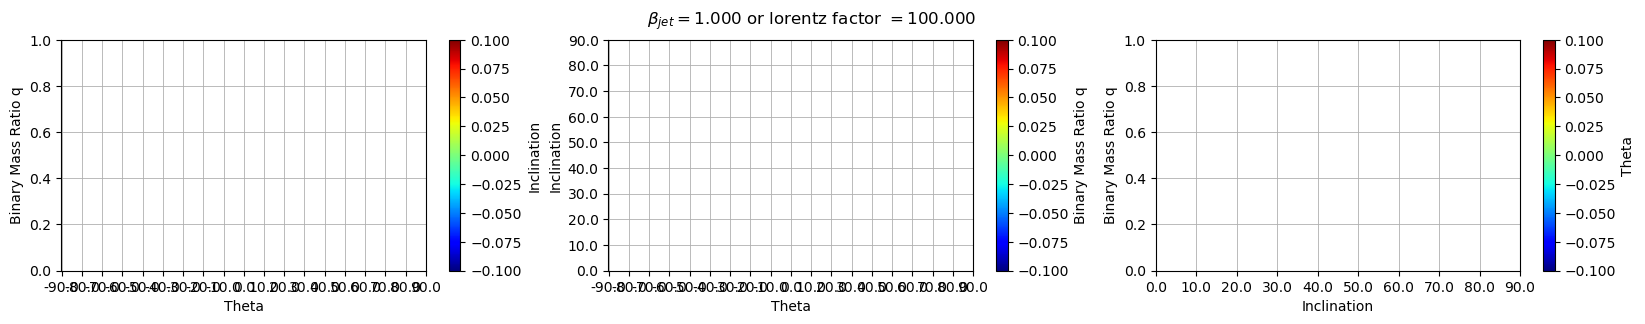

In [12]:
lorentzmin = 1
lorentzmax = 100

vmin = np.sqrt(1-lorentzmin**(-2))
vmax = np.sqrt(1-lorentzmax**(-2))
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree

lt = np.linspace(np.deg2rad(tmin),np.deg2rad(tmax),1000)
lv = np.linspace(vmin,vmax,10)
lq = np.linspace(qmin,qmax,1000)
li = np.linspace(np.deg2rad(imin),np.deg2rad(imax),1000)

for var in lv:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,3))
    fig.suptitle(r'$\beta_{jet}=%.3f$ or lorentz factor $= %.3f$'%(var, 1/np.sqrt(1-var**(2))))
    
    ###### INCLINATION #############################################################
    lt_grid,lq_grid = np.meshgrid(lt,lq)
    
    func = inclination(lq_grid, var, lt_grid,**par).to(u.degree).value

    index = np.where((func > imax)|(func < imin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: Inclination empty")
    im = ax1.pcolormesh(lt_grid,lq_grid,func, cmap='jet')
    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax1.contour(lt,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Inclination')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax1.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax1.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Binary Mass Ratio q')
    ax1.grid(linewidth=0.6)
    
    ###### BINARY-MASS-RATIO #############################################################
    lt_grid,li_grid = np.meshgrid(lt,li)

    func = binary_mass_ratio(li_grid, var, lt_grid, **par).value

    index = np.where((func > qmax)|(func < qmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: q empty")
    im = ax2.pcolormesh(lt_grid, li_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,1,100)
    # Plot contours using linear levels
    #contour1 = ax2.contour(lt,li, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Binary Mass Ratio q')

    #ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    ax2.yaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax2.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.yaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Inclination')
    ax2.grid(linewidth=0.6)
    
    ###### THETA #############################################################
    li_grid,lq_grid = np.meshgrid(li,lq)

    func = theta(li_grid, lq_grid, var, **par).to(u.degree).value
    
    index = np.where((func > tmax)|(func < tmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: theta empty")
    im = ax3.pcolormesh(li_grid, lq_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax3.contour(li,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Theta')

    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax3.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax3.set_xlabel('Inclination')
    ax3.set_ylabel('Binary Mass Ratio q') 
    ax3.grid(linewidth=0.6)

## Grenzwertbetrachtung

In [13]:
inc_min = np.deg2rad(0)
inc_max = np.deg2rad(90)

ratio_min = 1e-8
ratio_max = 1

lorentzmin = 1
lorentzmax = 100

beta_min = np.sqrt(1-lorentzmin**(-2))
beta_max = np.sqrt(1-lorentzmax**(-2))

theta_min = np.deg2rad(0)
theta_max = np.deg2rad(90)

In [14]:
inc_min = inclination(ratio_max, beta_max, theta_min, **par)
ratio_min = binary_mass_ratio(inc_max, beta_max, theta_min, **par)
beta_min = beta_jet(inc_max, ratio_max, theta_min, **par)
theta_max = theta(inc_max, ratio_max, beta_max, **par)

In [15]:
ratio_max

1

In [16]:
inc_err = err_inclination(ratio_max,beta_max, theta_min, **errors, **par)*u.rad
ratio_err = err_binary_mass_ratio(inc_max, beta_max, theta_min, **errors, **par)
beta_err = err_beta_jet(inc_max, ratio_max, theta_min, **errors, **par)
theta_err = err_theta(inc_max, ratio_max, beta_max, **errors, **par)*u.rad

x = <Quantity 3.80146987>
Constante2 = <Quantity 15.59680333>
y = <Quantity 4.50079912>


/home/praktikum/miniforge3/envs/fermipy/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [17]:
print(f"inc_min: {inc_min.to(u.degree):.4f}")
print(f"inc_err: {inc_err.to(u.degree):.4f}")
print(f"ratio_min: {ratio_min:.4f}")
print(f"ratio_err: {ratio_err:.4f}")
print(f"beta_min: {beta_min:.4f} c")
print(f"beta_err: {beta_err.value:.4f} c")
print(f"lorentz_min: {np.sqrt(1/(1-beta_min**2)):.4f}")
lorentz_err = (beta_min*beta_err.value)/(1-beta_min**2)**(3/2)
print(f"lorentz_err: {lorentz_err.value:.4f}")
print(f"theta_max: {theta_max.to(u.degree):.4f}")
print(f"theta_err: {theta_err.to(u.degree):.4f}")

inc_min: nan deg
inc_err: nan deg
ratio_min: -2.1102
ratio_err: 0.0641
beta_min: 4.5006 c
beta_err: 2.5758 c
lorentz_min: nan
lorentz_err: nan
theta_max: nan deg
theta_err: nan deg


/home/praktikum/miniforge3/envs/fermipy/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


# PG 1553

In [18]:
z = 0.36
err_redshift = 0.*z
M = 4.3e9
err_bhmass = .4*np.log(10)*M
q= 0.1

p=2.1
err_period = .2
a=0.2419162231796644
err_amp= 0.02401083064498759
alpha=1.56603380100
err_alpha = 0.01735751878

par={'amplitude': a, 'bhmass': M, 'period': p, 'redshift': z, 'spectral_index': alpha}
errors = {'err_amp': err_amp, 'err_alpha': err_alpha, 'err_period': err_period, 'err_redshift': err_redshift, 'err_bhmass': err_bhmass}

## Free Binary Mass Ratio

### Graphical Interface

In [19]:
lt = np.linspace(0,np.pi/2,100)
lv = np.linspace(0,1,100)
lq = np.linspace(0,1,100)
li = np.linspace(0,np.pi/2,100)

#### Starting point
vmin = 0
vmax = 1
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree
#### Erste Werte
vmin = 0.56
vmax = 1
qmin = 0
qmax = .52
imin = 40
imax = 90 # in degree
tmin = -60
tmax = 60 # in degree


0.69: Inclination empty


/tmp/ipykernel_90884/3865337893.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))


0.69: q empty
0.69: theta empty


/tmp/ipykernel_90884/1209602324.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))


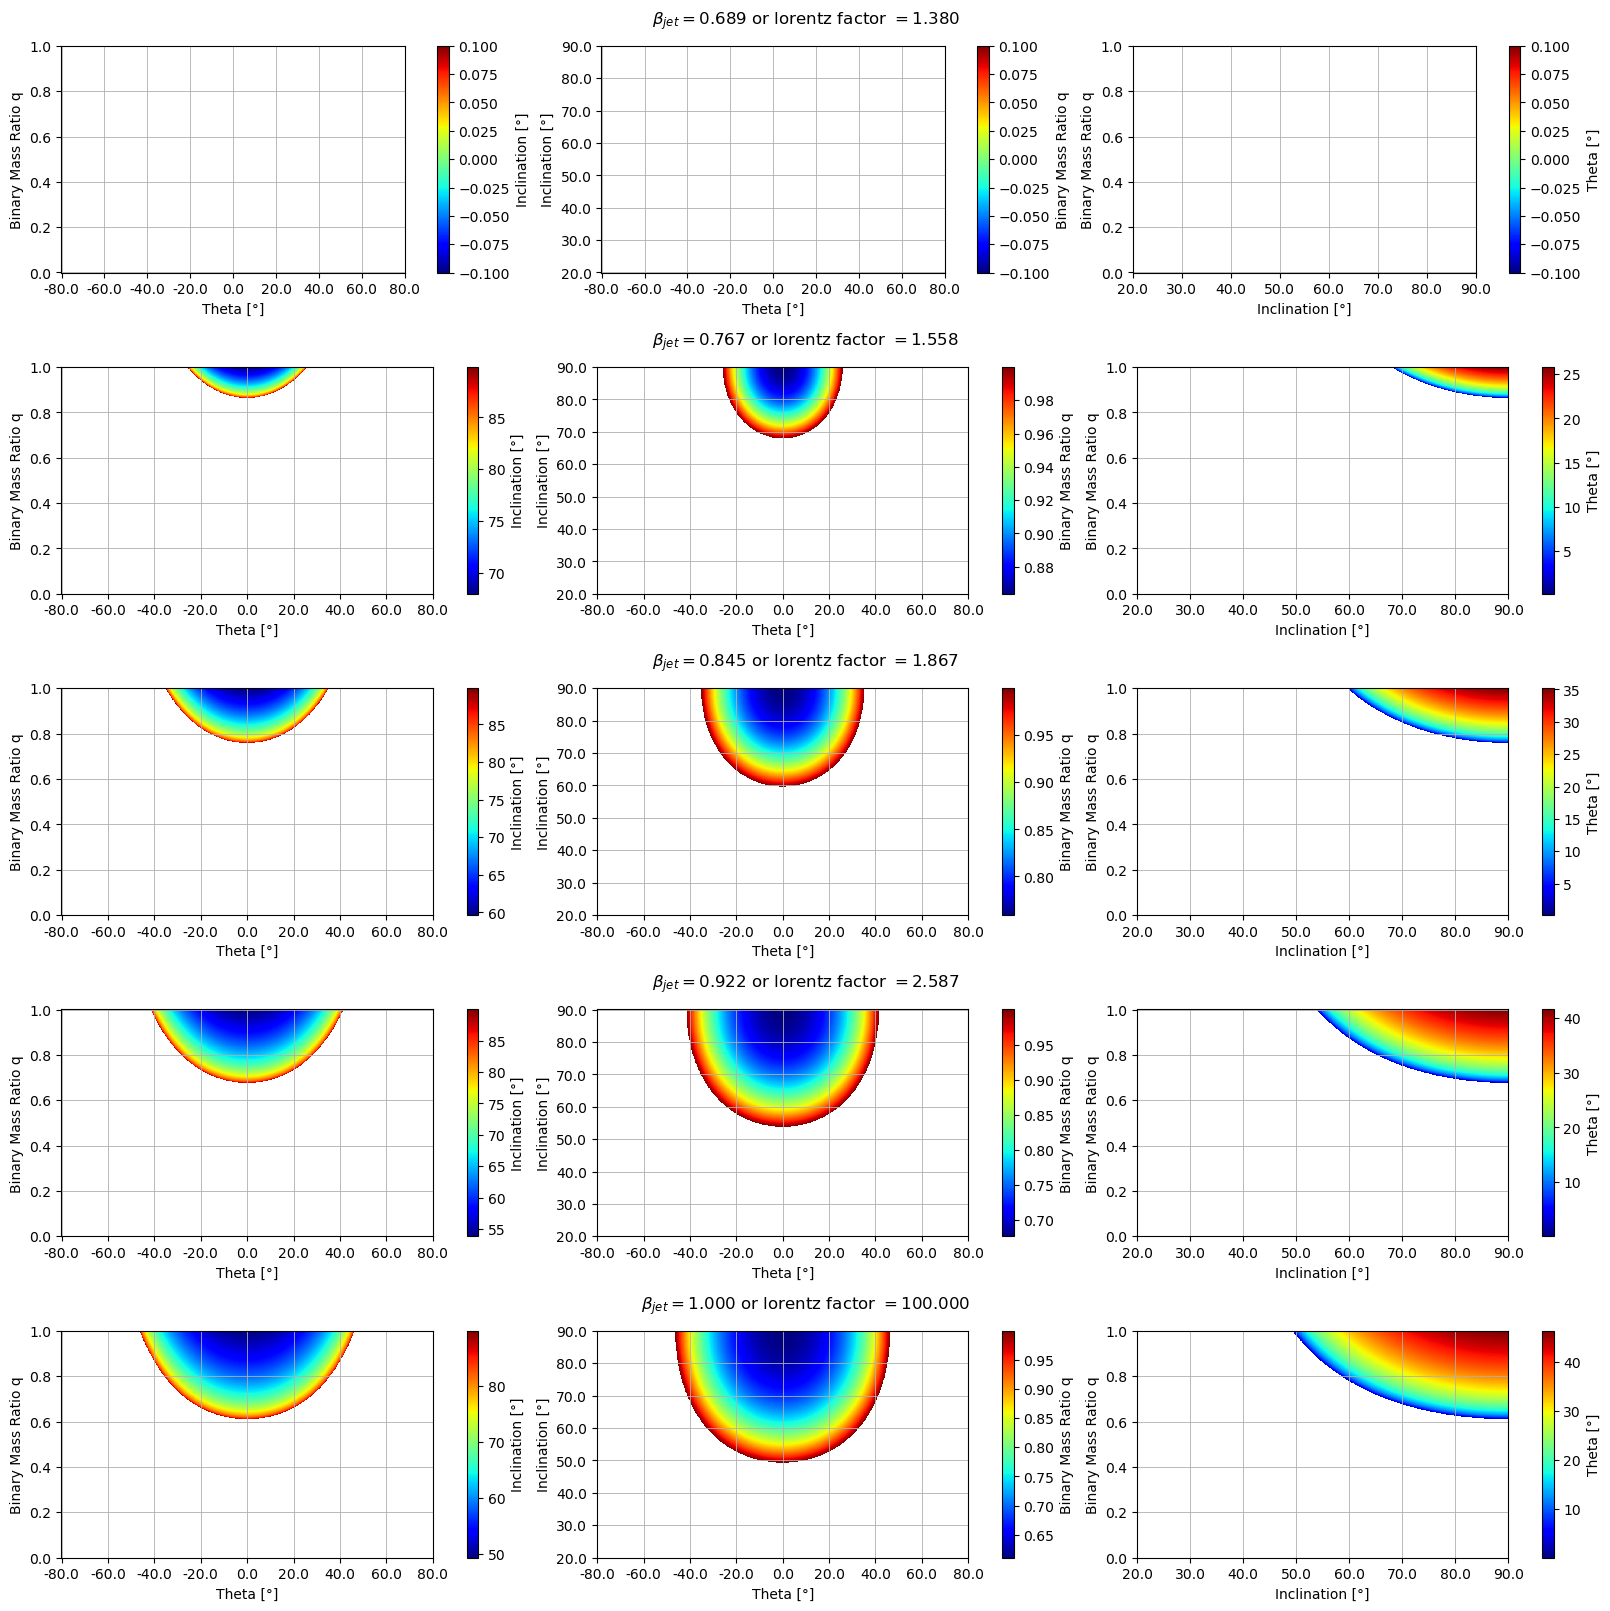

In [20]:
lorentzmin = 1.380
lorentzmax = 100

vmin = np.sqrt(1-lorentzmin**(-2))
vmax = np.sqrt(1-lorentzmax**(-2))
qmin = 0
qmax = 1
imin = 20
imax = 90 # in degree
tmin = -80
tmax = 80 # in degree

rows =5
lt = np.linspace(np.deg2rad(tmin),np.deg2rad(tmax),1000)
lv = np.linspace(vmin,vmax,rows)
lq = np.linspace(qmin,qmax,1000)
li = np.linspace(np.deg2rad(imin),np.deg2rad(imax),1000)

fig = plt.figure(constrained_layout=True,figsize=(16,16))

subfigs = fig.subfigures(nrows=rows, ncols=1)
for row, subfig in enumerate(subfigs):
    var = lv[row]
    subfig.suptitle(r'$\beta_{jet}=%.3f$ or lorentz factor $= %.3f$'%(var, 1/np.sqrt(1-var**(2))))

    (ax1, ax2, ax3) = subfig.subplots(1,3)
    
    ###### INCLINATION #############################################################
    lt_grid,lq_grid = np.meshgrid(lt,lq)
    
    func = inclination(lq_grid, var, lt_grid,**par).to(u.degree).value
    
    index = np.where((func > imax)|(func < imin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: Inclination empty")
    im = ax1.pcolormesh(lt_grid,lq_grid,func, cmap='jet')
    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax1.contour(lt,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Inclination [°]')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax1.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 20 # in degrees
    ax1.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax1.set_xlabel('Theta [°]')
    ax1.set_ylabel('Binary Mass Ratio q')
    ax1.grid(linewidth=0.6)
    
    ###### BINARY-MASS-RATIO #############################################################
    lt_grid,li_grid = np.meshgrid(lt,li)

    func = binary_mass_ratio(li_grid, var, lt_grid, **par).value

    index = np.where((func > qmax)|(func < qmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: q empty")
    im = ax2.pcolormesh(lt_grid, li_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,1,100)
    # Plot contours using linear levels
    #contour1 = ax2.contour(lt,li, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Binary Mass Ratio q')

    #ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    ax2.yaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 20 # in degrees
    ax2.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.yaxis.set_major_locator(MultipleLocator(tick_spacing/2*np.pi/180))
    ax2.set_xlabel('Theta [°]')
    ax2.set_ylabel('Inclination [°]')
    ax2.grid(linewidth=0.6)
    
    ###### THETA #############################################################
    li_grid,lq_grid = np.meshgrid(li,lq)

    func = theta(li_grid, lq_grid, var, **par).to(u.degree).value
    
    index = np.where((func > tmax)|(func < tmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: theta empty")
    im = ax3.pcolormesh(li_grid, lq_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax3.contour(li,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Theta [°]')

    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax3.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax3.set_xlabel('Inclination [°]')
    ax3.set_ylabel('Binary Mass Ratio q') 
    ax3.grid(linewidth=0.6)
# fig.savefig('/home/praktikum/kfischer/auswertung/PG_1553/DopplerErgebnis_BiggerBH.png',dpi=300)

### Grenzwertbetrachtung

In [21]:
inc_min = np.deg2rad(0)
inc_max = np.deg2rad(90)

ratio_min = 1e-8
ratio_max = 1

lorentzmin = 1
lorentzmax = 100

beta_min = np.sqrt(1-lorentzmin**(-2))
beta_max = np.sqrt(1-lorentzmax**(-2))

theta_min = np.deg2rad(0)
theta_max = np.deg2rad(90)

In [22]:
inc_min = inclination(ratio_max, beta_max, theta_min, **par)
ratio_min = binary_mass_ratio(inc_max, beta_max, theta_min, **par)
beta_min = beta_jet(inc_max, ratio_max, theta_min, **par)
theta_max = theta(inc_max, ratio_max, beta_max, **par)

In [23]:
ratio_max

1

In [24]:
inc_err = err_inclination(ratio_max,beta_max, theta_min, **errors, **par)*u.rad
ratio_err = err_binary_mass_ratio(inc_max, beta_max, theta_min, **errors, **par)
beta_err = err_beta_jet(inc_max, ratio_max, theta_min, **errors, **par)
theta_err = err_theta(inc_max, ratio_max, beta_max, **errors, **par)*u.rad

x = <Quantity 0.75811483>
Constante2 = <Quantity 7.15421797>
y = <Quantity 0.69028114>


In [25]:
print(f"inc_min: {inc_min.to(u.degree):.4f}")
print(f"inc_err: {inc_err.to(u.degree):.4f}")
print(f"ratio_min: {ratio_min:.4f}")
print(f"ratio_err: {ratio_err:.4f}")
print(f"beta_min: {beta_min:.4f} c")
print(f"beta_err: {beta_err.value:.4f} c")
print(f"lorentz_min: {np.sqrt(1/(1-beta_min**2)):.4f}")
lorentz_err = (beta_min*beta_err.value)/(1-beta_min**2)**(3/2)
print(f"lorentz_err: {lorentz_err.value:.4f}")
print(f"theta_max: {theta_max.to(u.degree):.4f}")
print(f"theta_err: {theta_err.to(u.degree):.4f}")

inc_min: 49.2983 deg
inc_err: 21.5969 deg
ratio_min: 0.6105
ratio_err: 2.2954
beta_min: 0.6902 c
beta_err: 0.3147 c
lorentz_min: 1.3820
lorentz_err: 0.5734
theta_max: 46.3476 deg
theta_err: 24.9235 deg


# PKS 2155

In [26]:
z = 0.116
err_redshift = 0.002000
M = 8.13e8 
err_bhmass = .4*np.log(10)*M
p=1.7
err_period = .1
a=0.22914441285798884
err_amp= 0.03727972270644807
alpha=1.803915269000
err_alpha = 0.008588104896 


# M+=err_bhmass

# p-=err_period

# a-=err_amp

# alpha+=err_alpha


par={'amplitude': a, 'bhmass': M, 'period': p, 'redshift': z, 'spectral_index': alpha}
errors = {'err_amp': err_amp, 'err_alpha': err_alpha, 'err_period': err_period, 'err_redshift': err_redshift, 'err_bhmass': err_bhmass}

## Graphical Interface

In [27]:
lt = np.linspace(0,np.pi/2,100)
lv = np.linspace(0,1,100)
lq = np.linspace(0,1,100)
li = np.linspace(0,np.pi/2,100)

### Starting point
vmin = 0
vmax = 1
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree
### Erste Werte
vmin = 0.56
vmax = 1
qmin = 0
qmax = .52
imin = 40
imax = 90 # in degree
tmin = -60
tmax = 60 # in degree


0.94: Inclination empty


/tmp/ipykernel_90884/3865337893.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))


0.94: q empty
0.94: theta empty


/tmp/ipykernel_90884/1209602324.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))


0.95: Inclination empty
0.95: q empty
0.95: theta empty
0.97: Inclination empty
0.97: q empty
0.97: theta empty
0.98: Inclination empty
0.98: q empty
0.98: theta empty
1.00: Inclination empty
1.00: q empty
1.00: theta empty


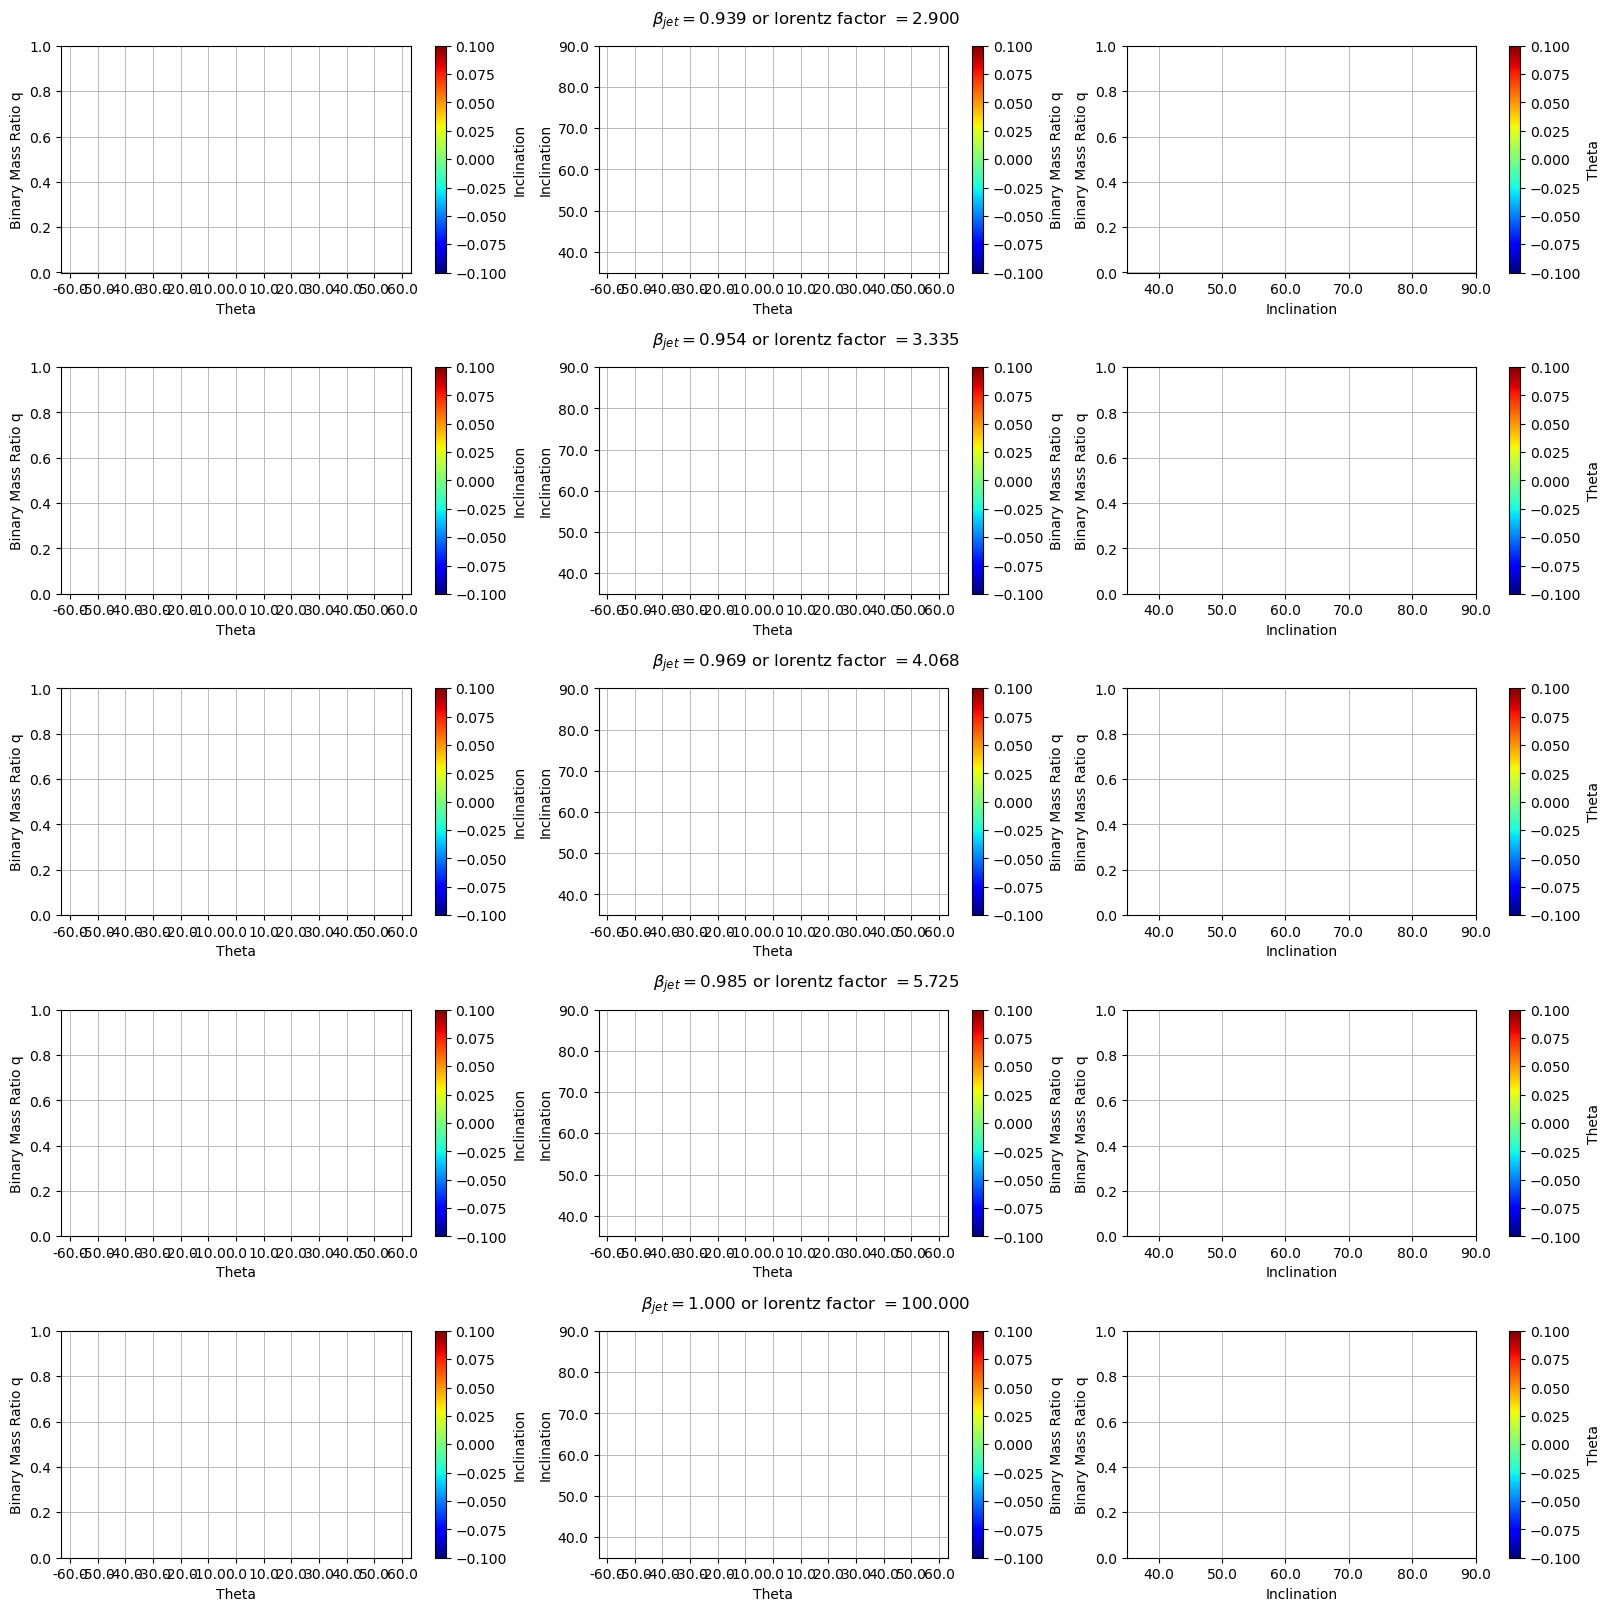

In [28]:
lorentzmin = 2.9
lorentzmax = 100

vmin = np.sqrt(1-lorentzmin**(-2))
vmax = np.sqrt(1-lorentzmax**(-2))
qmin = 0
qmax = 1
imin = 35
imax = 90 # in degree
tmin = -63
tmax = 63 # in degree

rows =5
lt = np.linspace(np.deg2rad(tmin),np.deg2rad(tmax),1000)
lv = np.linspace(vmin,vmax,rows)
lq = np.linspace(qmin,qmax,1000)
li = np.linspace(np.deg2rad(imin),np.deg2rad(imax),1000)

fig = plt.figure(constrained_layout=True,figsize=(16,16))

subfigs = fig.subfigures(nrows=rows, ncols=1)
for row, subfig in enumerate(subfigs):
    var = lv[row]
    subfig.suptitle(r'$\beta_{jet}=%.3f$ or lorentz factor $= %.3f$'%(var, 1/np.sqrt(1-var**(2))))

    (ax1, ax2, ax3) = subfig.subplots(1,3)
    
    ###### INCLINATION #############################################################
    lt_grid,lq_grid = np.meshgrid(lt,lq)
    
    func = inclination(lq_grid, var, lt_grid,**par).to(u.degree).value
    
    index = np.where((func > imax)|(func < imin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: Inclination empty")
    im = ax1.pcolormesh(lt_grid,lq_grid,func, cmap='jet')
    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax1.contour(lt,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Inclination')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax1.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax1.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Binary Mass Ratio q')
    ax1.grid(linewidth=0.6)
    
    ###### BINARY-MASS-RATIO #############################################################
    lt_grid,li_grid = np.meshgrid(lt,li)

    func = binary_mass_ratio(li_grid, var, lt_grid, **par).value

    index = np.where((func > qmax)|(func < qmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: q empty")
    im = ax2.pcolormesh(lt_grid, li_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,1,100)
    # Plot contours using linear levels
    #contour1 = ax2.contour(lt,li, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Binary Mass Ratio q')

    #ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    ax2.yaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax2.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.yaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Inclination')
    ax2.grid(linewidth=0.6)
    
    ###### THETA #############################################################
    li_grid,lq_grid = np.meshgrid(li,lq)

    func = theta(li_grid, lq_grid, var, **par).to(u.degree).value
    
    index = np.where((func > tmax)|(func < tmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: theta empty")
    im = ax3.pcolormesh(li_grid, lq_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax3.contour(li,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Theta')

    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax3.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax3.set_xlabel('Inclination')
    ax3.set_ylabel('Binary Mass Ratio q') 
    ax3.grid(linewidth=0.6)

### Grenzwertbetrachtung

In [29]:
inc_min = np.deg2rad(0)
inc_max = np.deg2rad(90)

ratio_min = 1e-8
ratio_max = 1

lorentzmin = 1
lorentzmax = 100

beta_min = np.sqrt(1-lorentzmin**(-2))
beta_max = np.sqrt(1-lorentzmax**(-2))

theta_min = np.deg2rad(0)
theta_max = np.deg2rad(90)

In [30]:
inc_min = inclination(ratio_max, beta_max, theta_min, **par)
ratio_min = binary_mass_ratio(inc_max, beta_max, theta_min, **par)
beta_min = beta_jet(inc_max, ratio_max, theta_min, **par)
theta_max = theta(inc_max, ratio_max, beta_max, **par)

In [31]:
ratio_max

1

In [32]:
inc_err = err_inclination(ratio_max,beta_max, theta_min, **errors, **par)*u.rad
ratio_err = err_binary_mass_ratio(inc_max, beta_max, theta_min, **errors, **par)
beta_err = err_beta_jet(inc_max, ratio_max, theta_min, **errors, **par)
theta_err = err_theta(inc_max, ratio_max, beta_max, **errors, **par)*u.rad

x = <Quantity 1.18381556>
Constante2 = <Quantity 12.40860381>
y = <Quantity 1.2321407>


In [33]:
print(f"inc_min: {inc_min.to(u.degree):.4f}")
print(f"inc_err: {inc_err.to(u.degree):.4f}")
print(f"ratio_min: {ratio_min:.4f}")
print(f"ratio_err: {ratio_err:.4f}")
print(f"beta_min: {beta_min:.4f} c")
print(f"beta_err: {beta_err.value:.4f} c")
print(f"lorentz_min: {np.sqrt(1/(1-beta_min**2)):.4f}")
lorentz_err = (beta_min*beta_err.value)/(1-beta_min**2)**(3/2)
print(f"lorentz_err: {lorentz_err.value:.4f}")
print(f"theta_max: {theta_max.to(u.degree):.4f}")
print(f"theta_err: {theta_err.to(u.degree):.4f}")

inc_min: nan deg
inc_err: nan deg
ratio_min: 1.4504
ratio_err: 0.2795
beta_min: 1.2321 c
beta_err: 0.5203 c
lorentz_min: nan
lorentz_err: nan
theta_max: nan deg
theta_err: nan deg


# PKS 0454

In [34]:
z = 1.003
err_redshift = 0
M = 2.14e+08 
err_bhmass = .14*np.log(10)*M
p=3.5
err_period = .4
a=0.43406014393717207
err_amp= 0.06109259699768465
alpha=2.102060098000 
err_alpha = 0.009147607537 

par={'amplitude': a, 'bhmass': M, 'period': p, 'redshift': z, 'spectral_index': alpha}
errors = {'err_amp': err_amp, 'err_alpha': err_alpha, 'err_period': err_period, 'err_redshift': err_redshift, 'err_bhmass': err_bhmass}

## Graphical Interface

In [35]:
lt = np.linspace(0,np.pi/2,100)
lv = np.linspace(0,1,100)
lq = np.linspace(0,1,100)
li = np.linspace(0,np.pi/2,100)

### Starting point
vmin = 0
vmax = 1
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree
### Erste Werte
vmin = 0.56
vmax = 1
qmin = 0
qmax = .52
imin = 40
imax = 90 # in degree
tmin = -60
tmax = 60 # in degree


0.00: Inclination empty


/tmp/ipykernel_90884/3865337893.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))
/tmp/ipykernel_90884/1209602324.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))


0.00: q empty
0.00: theta empty
0.11: Inclination empty
0.11: q empty
0.11: theta empty
0.22: Inclination empty
0.22: q empty
0.22: theta empty
0.33: Inclination empty
0.33: q empty
0.33: theta empty
0.44: Inclination empty
0.44: q empty
0.44: theta empty
0.56: Inclination empty
0.56: q empty
0.56: theta empty
0.67: Inclination empty
0.67: q empty
0.67: theta empty
0.78: Inclination empty
0.78: q empty
0.78: theta empty
0.89: Inclination empty
0.89: q empty
0.89: theta empty
1.00: Inclination empty
1.00: q empty
1.00: theta empty


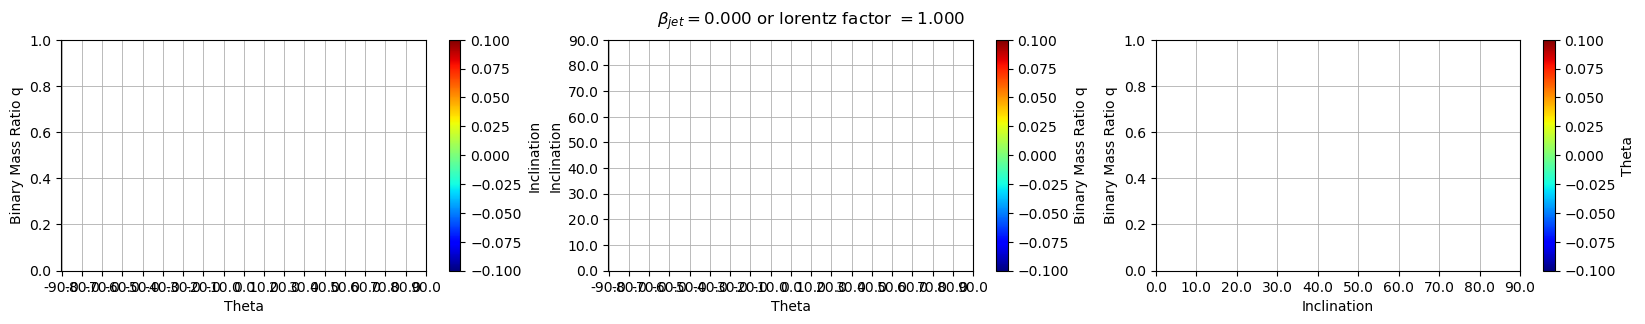

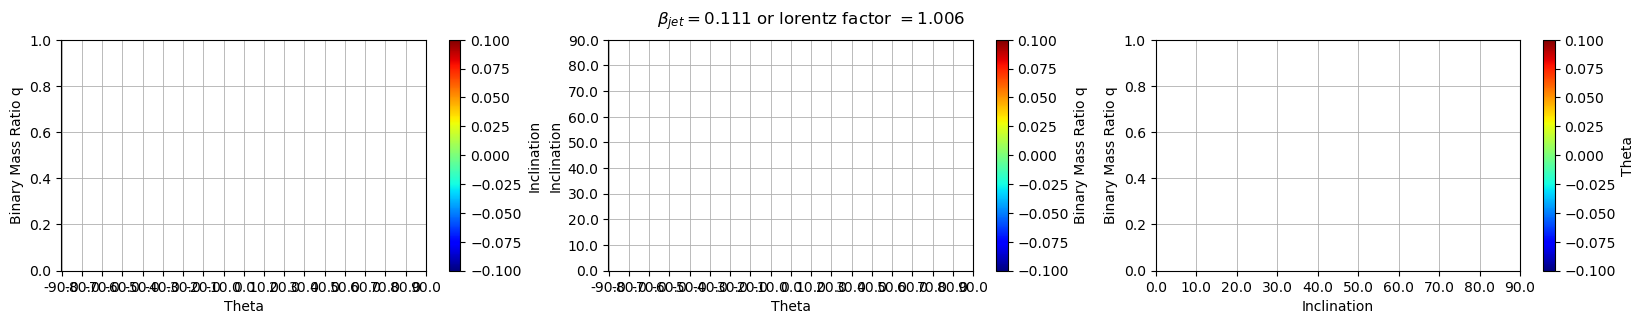

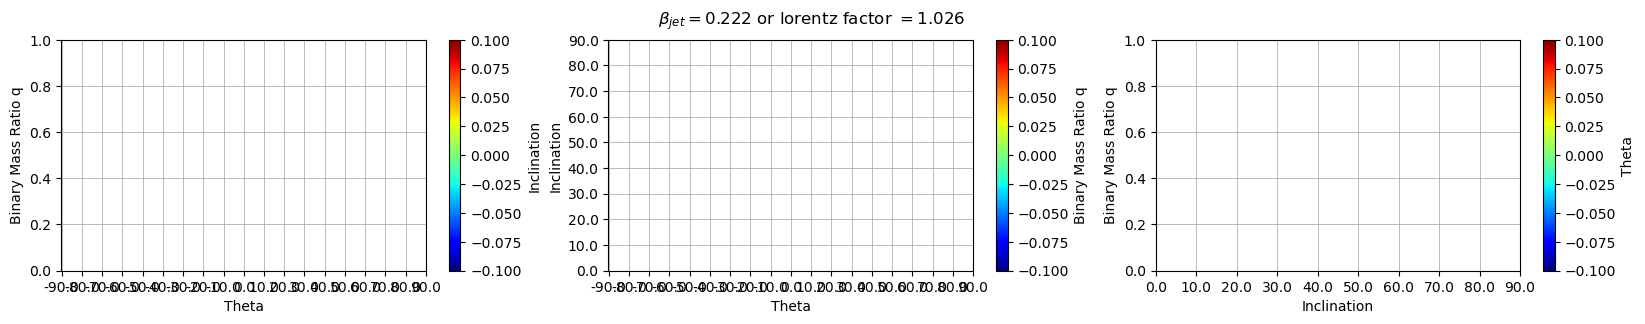

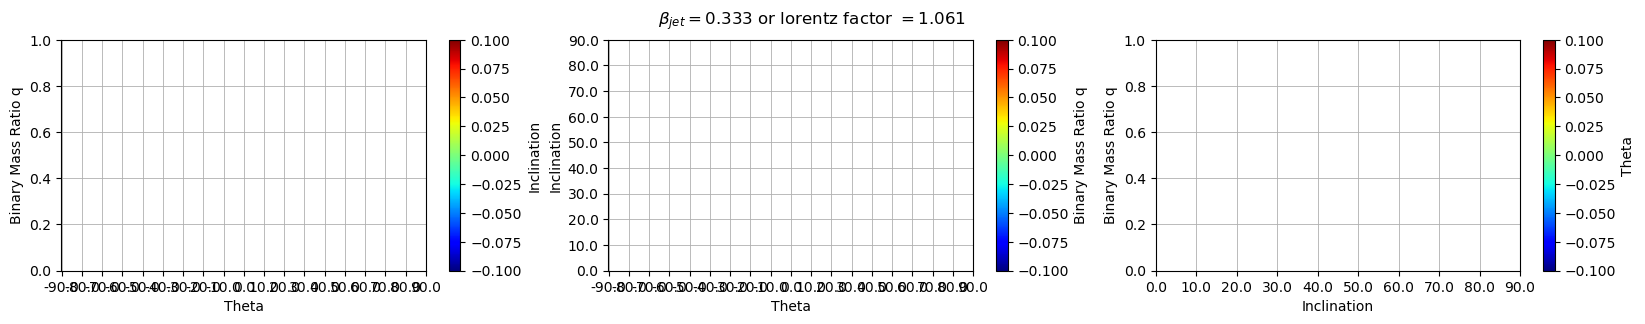

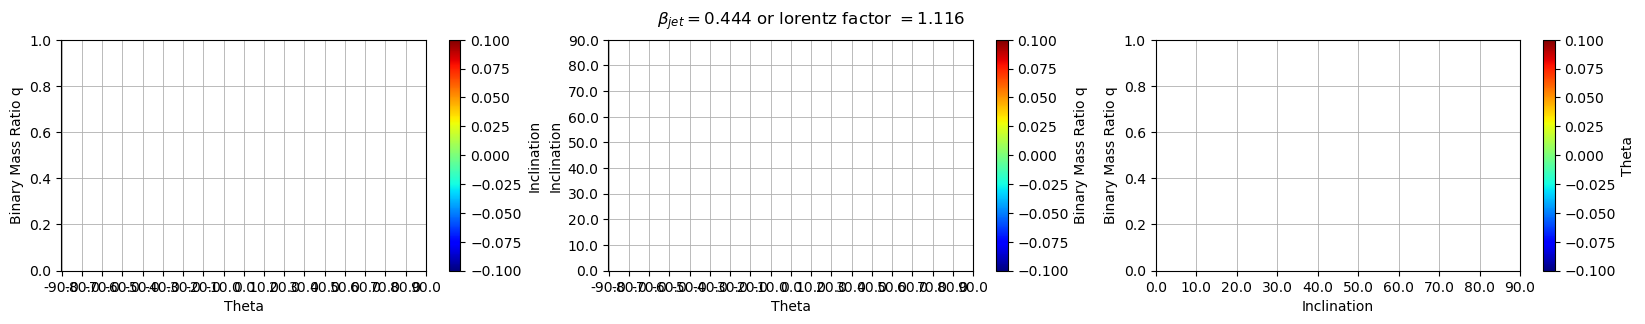

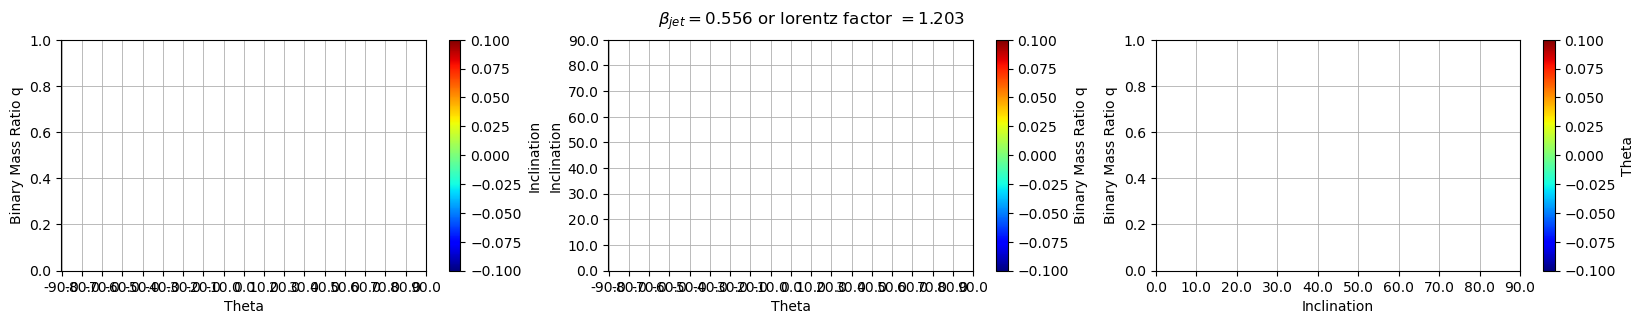

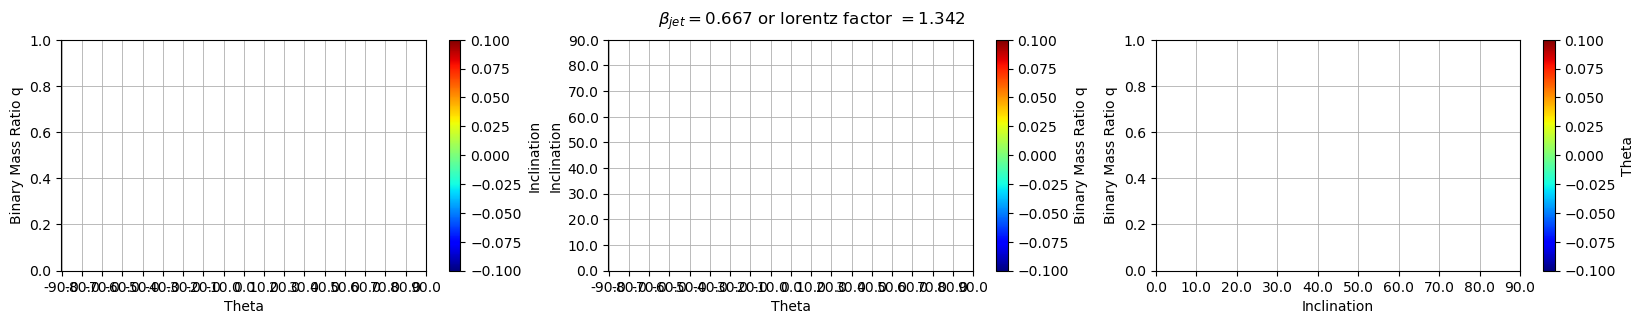

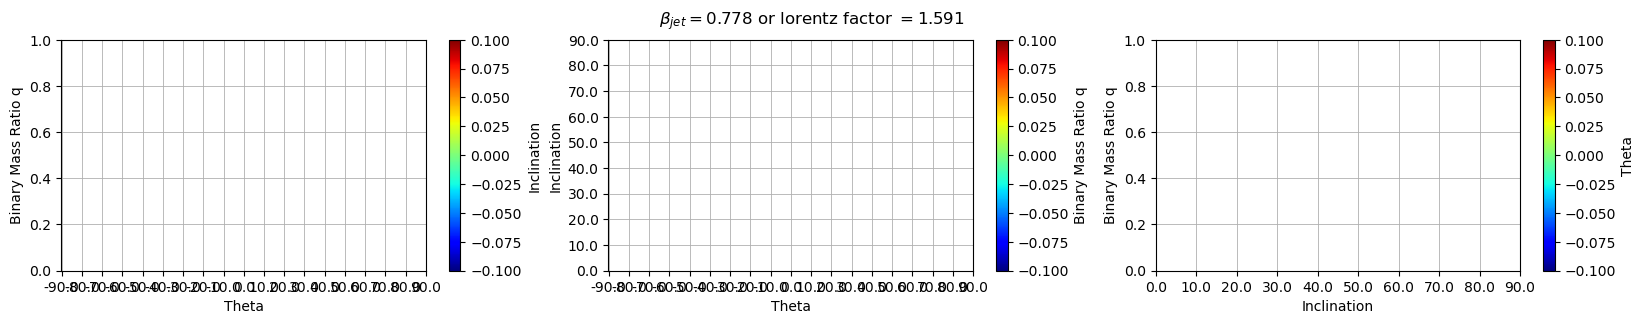

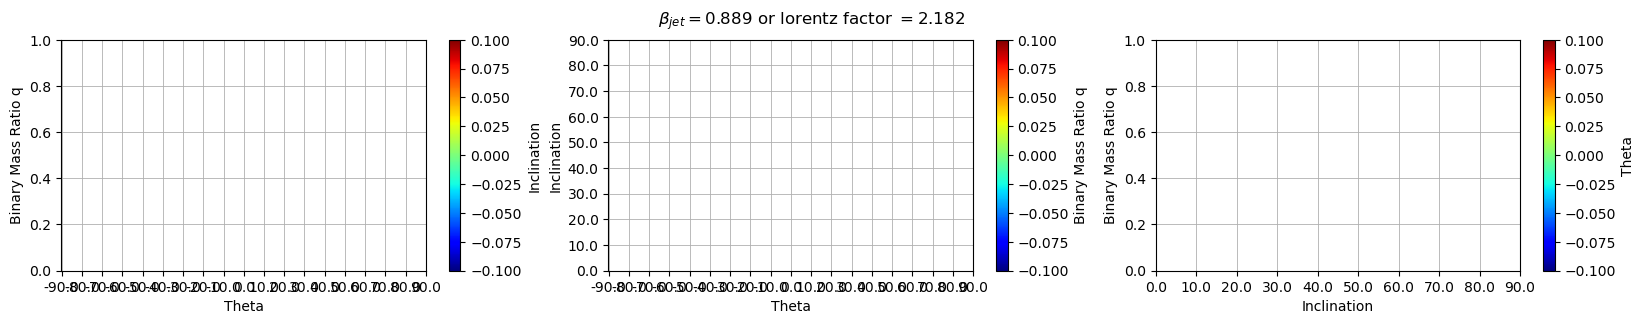

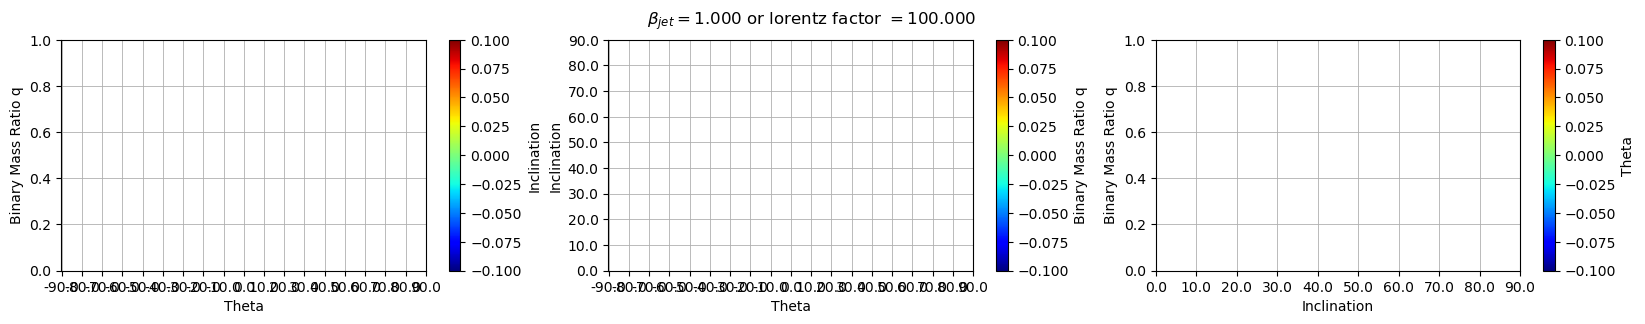

In [36]:
lorentzmin = 1
lorentzmax = 100

vmin = np.sqrt(1-lorentzmin**(-2))
vmax = np.sqrt(1-lorentzmax**(-2))
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree

lt = np.linspace(np.deg2rad(tmin),np.deg2rad(tmax),1000)
lv = np.linspace(vmin,vmax,10)
lq = np.linspace(qmin,qmax,1000)
li = np.linspace(np.deg2rad(imin),np.deg2rad(imax),1000)

for var in lv:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,3))
    fig.suptitle(r'$\beta_{jet}=%.3f$ or lorentz factor $= %.3f$'%(var, 1/np.sqrt(1-var**(2))))
    
    ###### INCLINATION #############################################################
    lt_grid,lq_grid = np.meshgrid(lt,lq)
    
    func = inclination(lq_grid, var, lt_grid,**par).to(u.degree).value
    
    index = np.where((func > imax)|(func < imin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: Inclination empty")
    im = ax1.pcolormesh(lt_grid,lq_grid,func, cmap='jet')
    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax1.contour(lt,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Inclination')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax1.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax1.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Binary Mass Ratio q')
    ax1.grid(linewidth=0.6)
    
    ###### BINARY-MASS-RATIO #############################################################
    lt_grid,li_grid = np.meshgrid(lt,li)

    func = binary_mass_ratio(li_grid, var, lt_grid, **par).value

    index = np.where((func > qmax)|(func < qmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: q empty")
    im = ax2.pcolormesh(lt_grid, li_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,1,100)
    # Plot contours using linear levels
    #contour1 = ax2.contour(lt,li, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Binary Mass Ratio q')

    #ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    ax2.yaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax2.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.yaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Inclination')
    ax2.grid(linewidth=0.6)
    
    ###### THETA #############################################################
    li_grid,lq_grid = np.meshgrid(li,lq)

    func = theta(li_grid, lq_grid, var, **par).to(u.degree).value
    
    index = np.where((func > tmax)|(func < tmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: theta empty")
    im = ax3.pcolormesh(li_grid, lq_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax3.contour(li,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Theta')

    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax3.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax3.set_xlabel('Inclination')
    ax3.set_ylabel('Binary Mass Ratio q') 
    ax3.grid(linewidth=0.6)

## Grenzwertbetrachtung

In [37]:
inc_min = np.deg2rad(0)
inc_max = np.deg2rad(90)

ratio_min = 1e-8
ratio_max = 1

lorentzmin = 1
lorentzmax = 100

beta_min = np.sqrt(1-lorentzmin**(-2))
beta_max = np.sqrt(1-lorentzmax**(-2))

theta_min = np.deg2rad(0)
theta_max = np.deg2rad(90)

In [38]:
inc_min = inclination(ratio_max, beta_max, theta_min, **par)
ratio_min = binary_mass_ratio(inc_max, beta_max, theta_min, **par)
beta_min = beta_jet(inc_max, ratio_max, theta_min, **par)
theta_max = theta(inc_max, ratio_max, beta_max, **par)

In [39]:
ratio_max

1

In [40]:
inc_err = err_inclination(ratio_max,beta_max, theta_min, **errors, **par)*u.rad
ratio_err = err_binary_mass_ratio(inc_max, beta_max, theta_min, **errors, **par)
beta_err = err_beta_jet(inc_max, ratio_max, theta_min, **errors, **par)
theta_err = err_theta(inc_max, ratio_max, beta_max, **errors, **par)*u.rad

x = <Quantity 3.44879802>
Constante2 = <Quantity 20.26823659>
y = <Quantity 4.04579572>


In [41]:
print(f"inc_min: {inc_min.to(u.degree):.4f}")
print(f"inc_err: {inc_err.to(u.degree):.4f}")
print(f"ratio_min: {ratio_min:.4f}")
print(f"ratio_err: {ratio_err:.4f}")
print(f"beta_min: {beta_min:.4f} c")
print(f"beta_err: {beta_err.value:.4f} c")
print(f"lorentz_min: {np.sqrt(1/(1-beta_min**2)):.4f}")
lorentz_err = (beta_min*beta_err.value)/(1-beta_min**2)**(3/2)
print(f"lorentz_err: {lorentz_err.value:.4f}")
print(f"theta_max: {theta_max.to(u.degree):.4f}")
print(f"theta_err: {theta_err.to(u.degree):.4f}")

inc_min: nan deg
inc_err: nan deg
ratio_min: -2.3805
ratio_err: 0.0185
beta_min: 4.0456 c
beta_err: 0.7770 c
lorentz_min: nan
lorentz_err: nan
theta_max: nan deg
theta_err: nan deg


# S5 0716

In [42]:
z = 0.241
err_redshift = 0.014
M = 1.20e+08 
err_bhmass = .4*np.log(10)*M
p=2.6
err_period = .4
a=0.3675321121098099
err_amp= 0.06017377166679062
alpha=2.028795504000 
err_alpha = 0.007815163436

par={'amplitude': a, 'bhmass': M, 'period': p, 'redshift': z, 'spectral_index': alpha}
errors = {'err_amp': err_amp, 'err_alpha': err_alpha, 'err_period': err_period, 'err_redshift': err_redshift, 'err_bhmass': err_bhmass}

## Graphical Interface

In [43]:
lt = np.linspace(0,np.pi/2,100)
lv = np.linspace(0,1,100)
lq = np.linspace(0,1,100)
li = np.linspace(0,np.pi/2,100)

### Starting point
vmin = 0
vmax = 1
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree
### Erste Werte
vmin = 0.56
vmax = 1
qmin = 0
qmax = .52
imin = 40
imax = 90 # in degree
tmin = -60
tmax = 60 # in degree


0.00: Inclination empty
0.00: q empty


/tmp/ipykernel_90884/3865337893.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.arcsin(Constante*(1+1/q)/(1+(2+alpha)*beta_jet*np.cos(theta)))
/tmp/ipykernel_90884/1209602324.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.arccos(((A*(1+1/q)*con.c)/np.sin(I)*((P)/((1+z)*2*np.pi*con.G*M))**(1./3)-1)/((2+alpha)*beta_jet))


0.00: theta empty
0.11: Inclination empty
0.11: q empty
0.11: theta empty
0.22: Inclination empty
0.22: q empty
0.22: theta empty
0.33: Inclination empty
0.33: q empty
0.33: theta empty
0.44: Inclination empty
0.44: q empty
0.44: theta empty
0.56: Inclination empty
0.56: q empty
0.56: theta empty
0.67: Inclination empty
0.67: q empty
0.67: theta empty
0.78: Inclination empty
0.78: q empty
0.78: theta empty
0.89: Inclination empty
0.89: q empty
0.89: theta empty
1.00: Inclination empty
1.00: q empty
1.00: theta empty


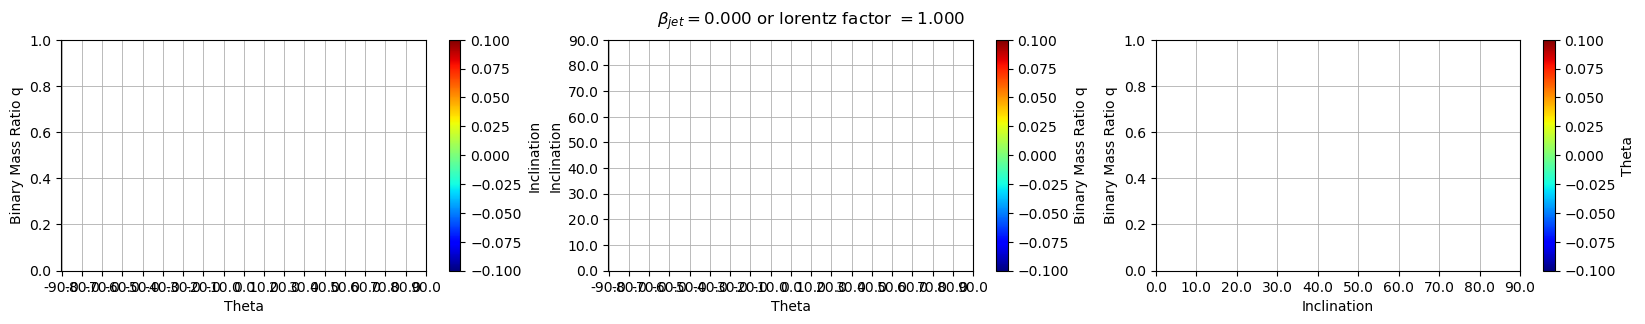

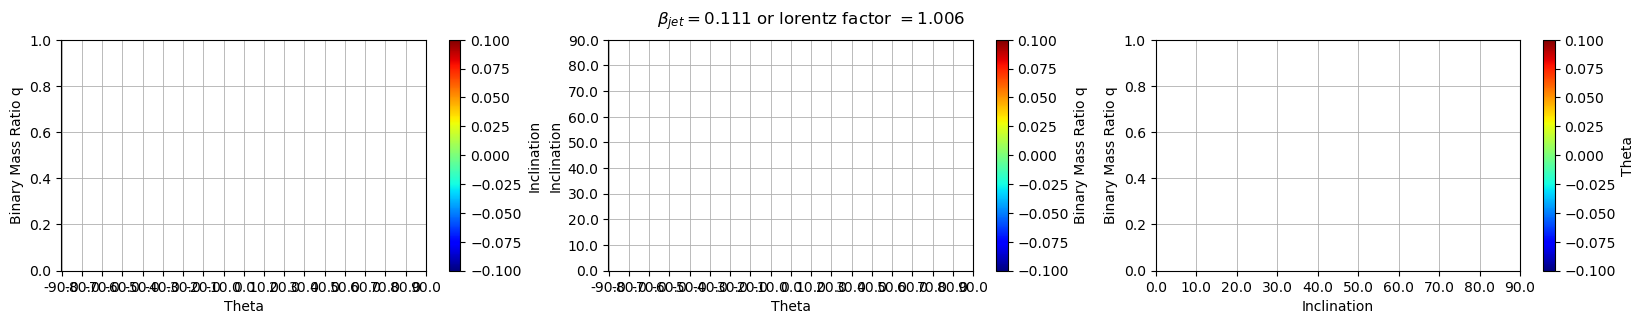

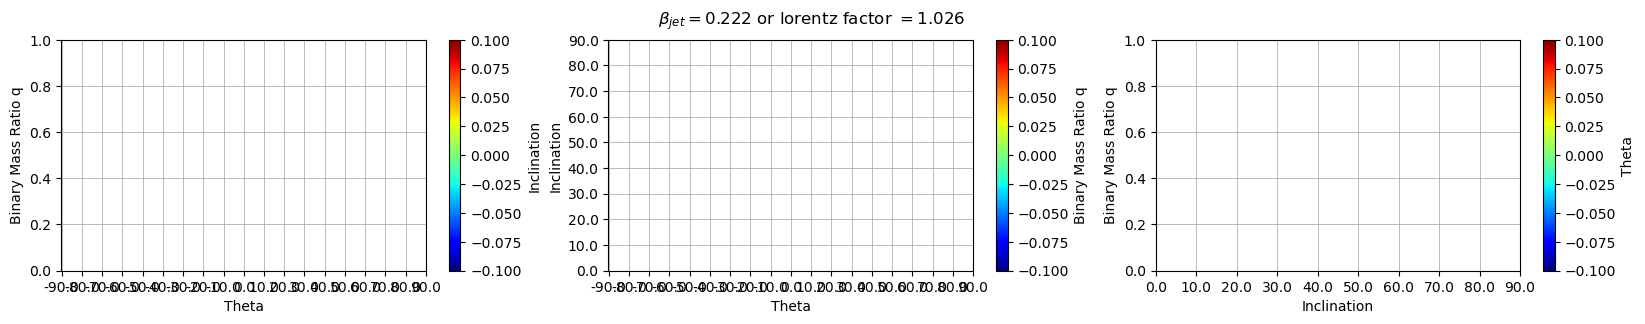

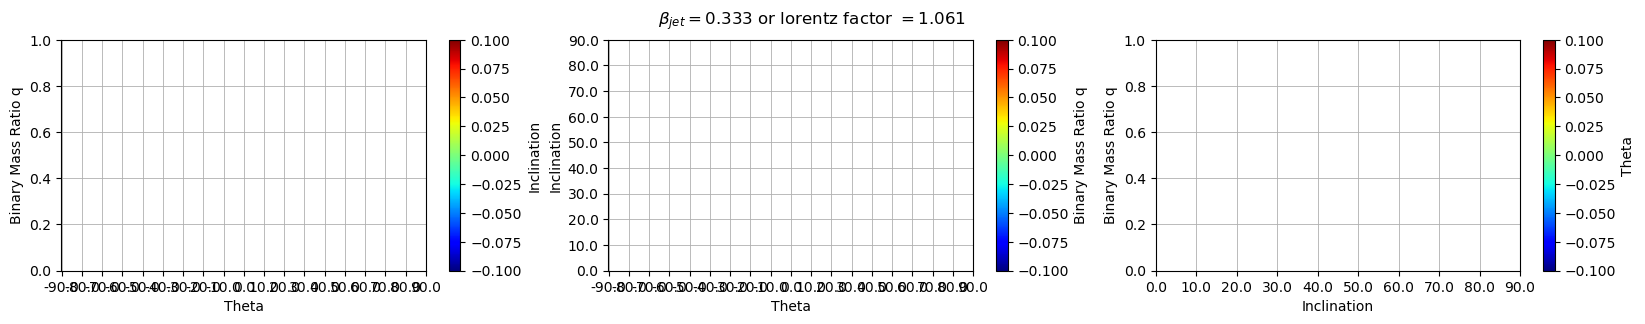

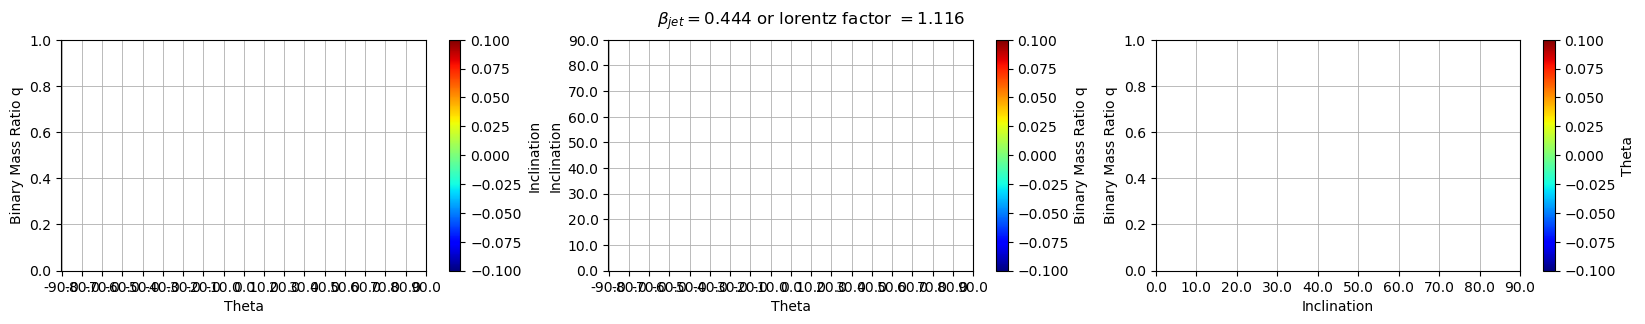

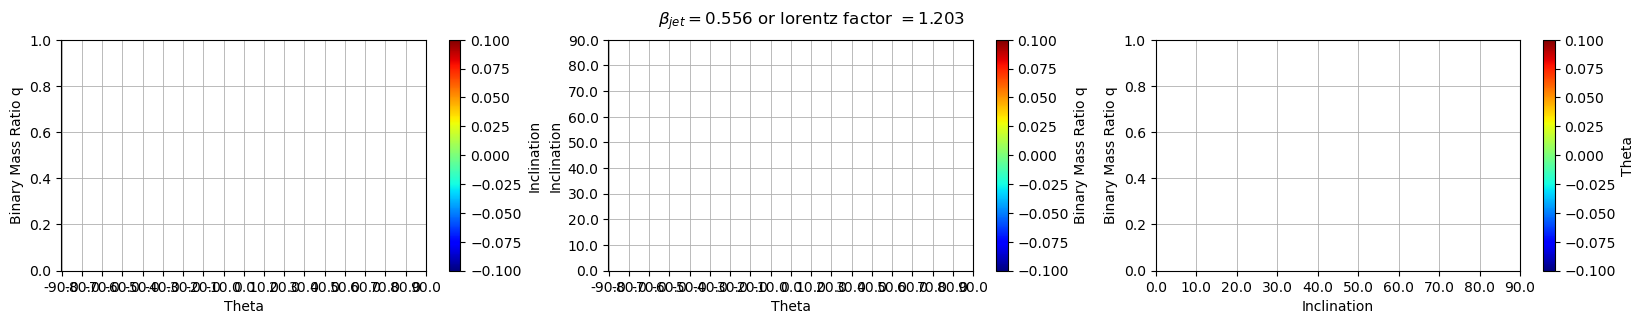

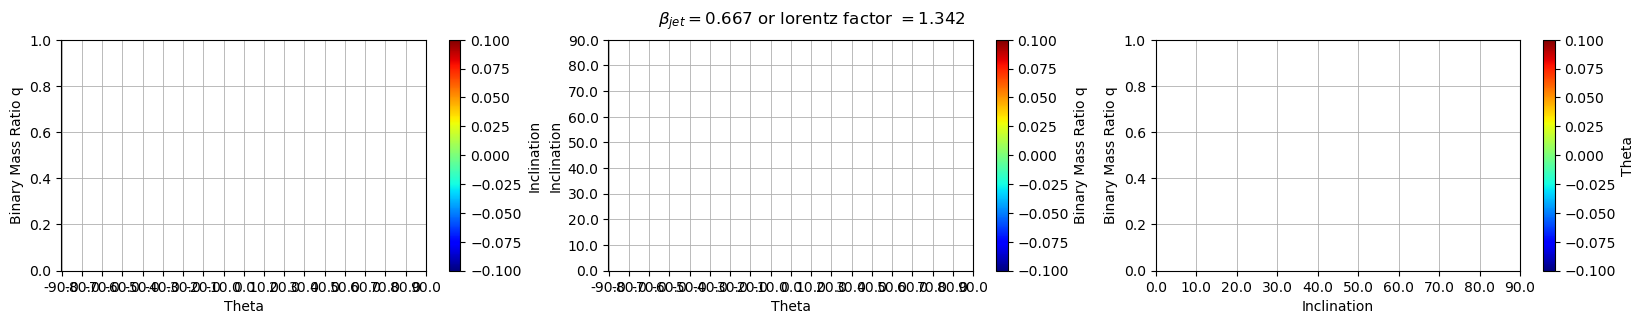

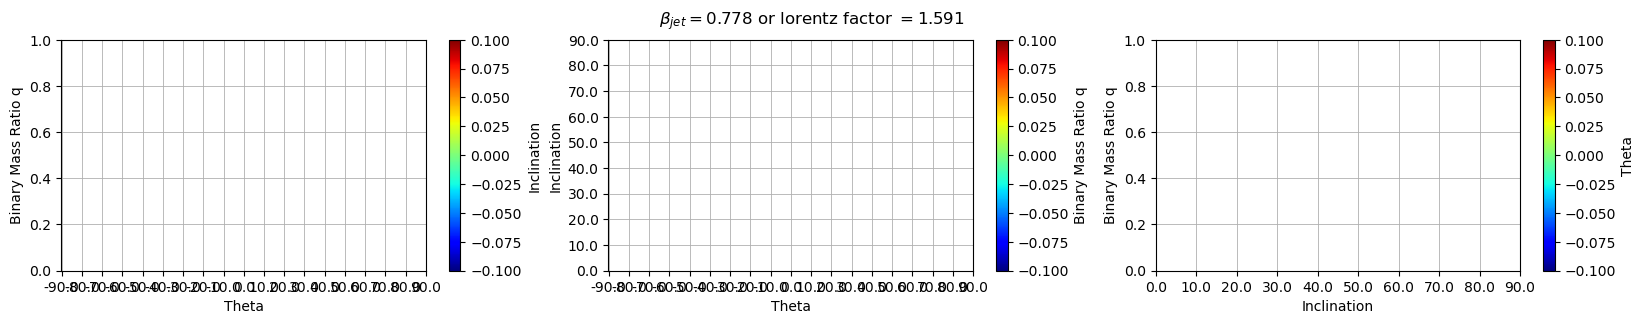

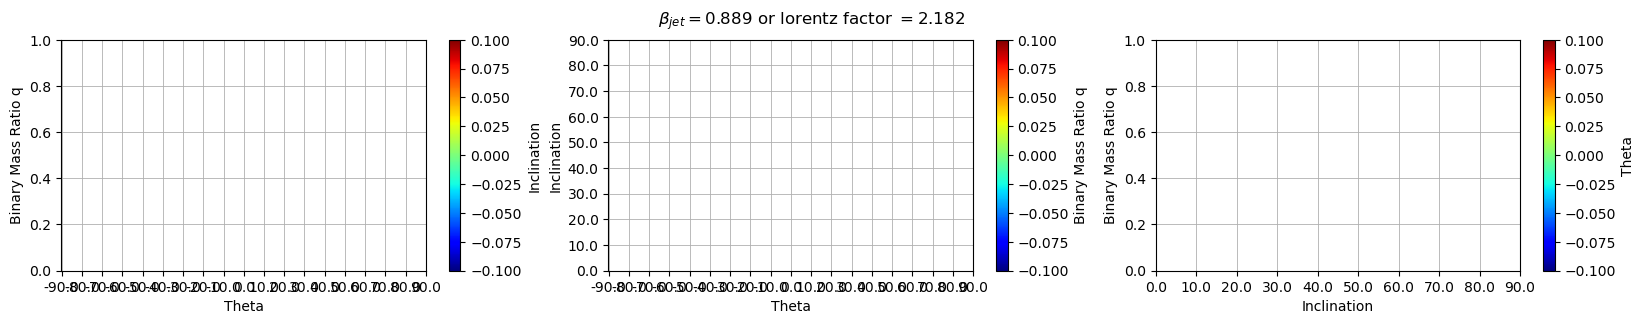

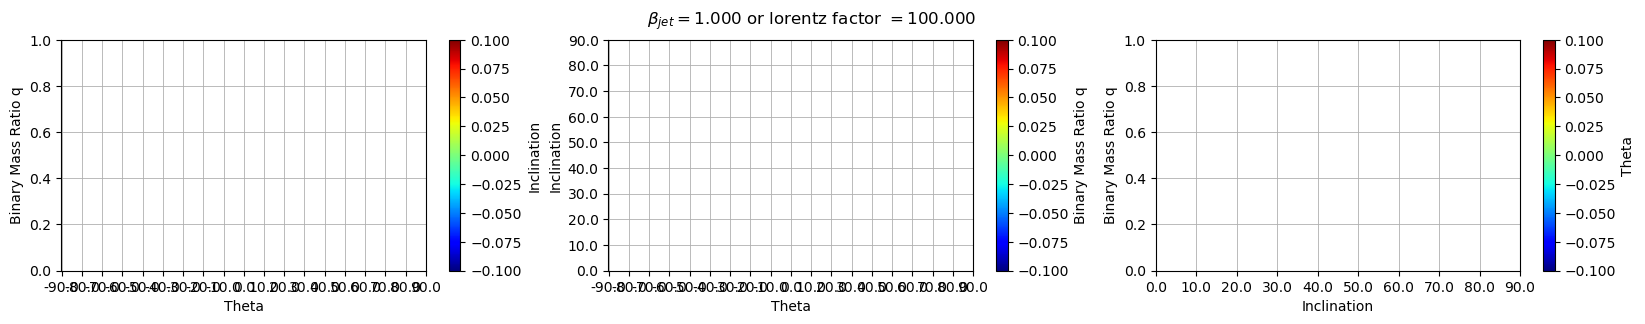

In [44]:
lorentzmin = 1
lorentzmax = 100

vmin = np.sqrt(1-lorentzmin**(-2))
vmax = np.sqrt(1-lorentzmax**(-2))
qmin = 0
qmax = 1
imin = 0
imax = 90 # in degree
tmin = -90
tmax = 90 # in degree

lt = np.linspace(np.deg2rad(tmin),np.deg2rad(tmax),1000)
lv = np.linspace(vmin,vmax,10)
lq = np.linspace(qmin,qmax,1000)
li = np.linspace(np.deg2rad(imin),np.deg2rad(imax),1000)

for var in lv:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,3))
    fig.suptitle(r'$\beta_{jet}=%.3f$ or lorentz factor $= %.3f$'%(var, 1/np.sqrt(1-var**(2))))
    
    ###### INCLINATION #############################################################
    lt_grid,lq_grid = np.meshgrid(lt,lq)
    
    func = inclination(lq_grid, var, lt_grid,**par).to(u.degree).value
    
    index = np.where((func > imax)|(func < imin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: Inclination empty")
    im = ax1.pcolormesh(lt_grid,lq_grid,func, cmap='jet')
    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax1.contour(lt,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Inclination')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax1.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax1.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Binary Mass Ratio q')
    ax1.grid(linewidth=0.6)
    
    ###### BINARY-MASS-RATIO #############################################################
    lt_grid,li_grid = np.meshgrid(lt,li)

    func = binary_mass_ratio(li_grid, var, lt_grid, **par).value

    index = np.where((func > qmax)|(func < qmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: q empty")
    im = ax2.pcolormesh(lt_grid, li_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,1,100)
    # Plot contours using linear levels
    #contour1 = ax2.contour(lt,li, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Binary Mass Ratio q')

    #ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    ax2.yaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax2.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.yaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Inclination')
    ax2.grid(linewidth=0.6)
    
    ###### THETA #############################################################
    li_grid,lq_grid = np.meshgrid(li,lq)

    func = theta(li_grid, lq_grid, var, **par).to(u.degree).value
    
    index = np.where((func > tmax)|(func < tmin))
    func[index]= np.nan
    if np.isnan(func).all():
        print(f"{var:.2f}: theta empty")
    im = ax3.pcolormesh(li_grid, lq_grid, func, cmap='jet')

    # Define contour levels in linear space
    contour_levels = np.linspace(0,np.pi/2,100)
    # Plot contours using linear levels
    #contour1 = ax3.contour(li,ll, func, levels=contour_levels,colors='red',linestyles='--')
    plt.colorbar(im, label='Theta')

    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(FuncFormatter(rad_to_deg))
    tick_spacing = 10 # in degrees
    ax3.xaxis.set_major_locator(MultipleLocator(tick_spacing*np.pi/180))
    ax3.set_xlabel('Inclination')
    ax3.set_ylabel('Binary Mass Ratio q') 
    ax3.grid(linewidth=0.6)

## Grenzwertbetrachtung

In [45]:
inc_min = np.deg2rad(0)
inc_max = np.deg2rad(90)

ratio_min = 1e-8
ratio_max = 1

lorentzmin = 1
lorentzmax = 100

beta_min = np.sqrt(1-lorentzmin**(-2))
beta_max = np.sqrt(1-lorentzmax**(-2))

theta_min = np.deg2rad(0)
theta_max = np.deg2rad(90)

In [46]:
inc_min = inclination(ratio_max, beta_max, theta_min, **par)
ratio_min = binary_mass_ratio(inc_max, beta_max, theta_min, **par)
beta_min = beta_jet(inc_max, ratio_max, theta_min, **par)
theta_max = theta(inc_max, ratio_max, beta_max, **par)

In [47]:
ratio_max

1

In [48]:
inc_err = err_inclination(ratio_max,beta_max, theta_min, **errors, **par)*u.rad
ratio_err = err_binary_mass_ratio(inc_max, beta_max, theta_min, **errors, **par)
beta_err = err_beta_jet(inc_max, ratio_max, theta_min, **errors, **par)
theta_err = err_theta(inc_max, ratio_max, beta_max, **errors, **par)*u.rad

x = <Quantity 3.81689611>
Constante2 = <Quantity 26.11148859>
y = <Quantity 4.51612171>


In [49]:
print(f"inc_min: {inc_min.to(u.degree):.4f}")
print(f"inc_err: {inc_err.to(u.degree):.4f}")
print(f"ratio_min: {ratio_min:.4f}")
print(f"ratio_err: {ratio_err:.4f}")
print(f"beta_min: {beta_min:.4f} c")
print(f"beta_err: {beta_err.value:.4f} c")
print(f"lorentz_min: {np.sqrt(1/(1-beta_min**2)):.4f}")
lorentz_err = (beta_min*beta_err.value)/(1-beta_min**2)**(3/2)
print(f"lorentz_err: {lorentz_err.value:.4f}")
print(f"theta_max: {theta_max.to(u.degree):.4f}")
print(f"theta_err: {theta_err.to(u.degree):.4f}")

inc_min: nan deg
inc_err: nan deg
ratio_min: -2.1008
ratio_err: 0.0418
beta_min: 4.5159 c
beta_err: 1.6756 c
lorentz_min: nan
lorentz_err: nan
theta_max: nan deg
theta_err: nan deg
